# End of Distribution Imputation

### Another way to capture the importance of missing data.

#### If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv',usecols =['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

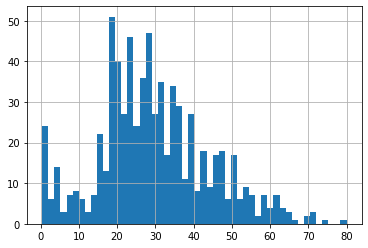

In [5]:
df.Age.hist(bins=50)

### 1. I will take the value which is at the end, farthest value.
### 2. Value after the 3rd Standard Deviation.(To understand this u can check  the normal distribution graph.)
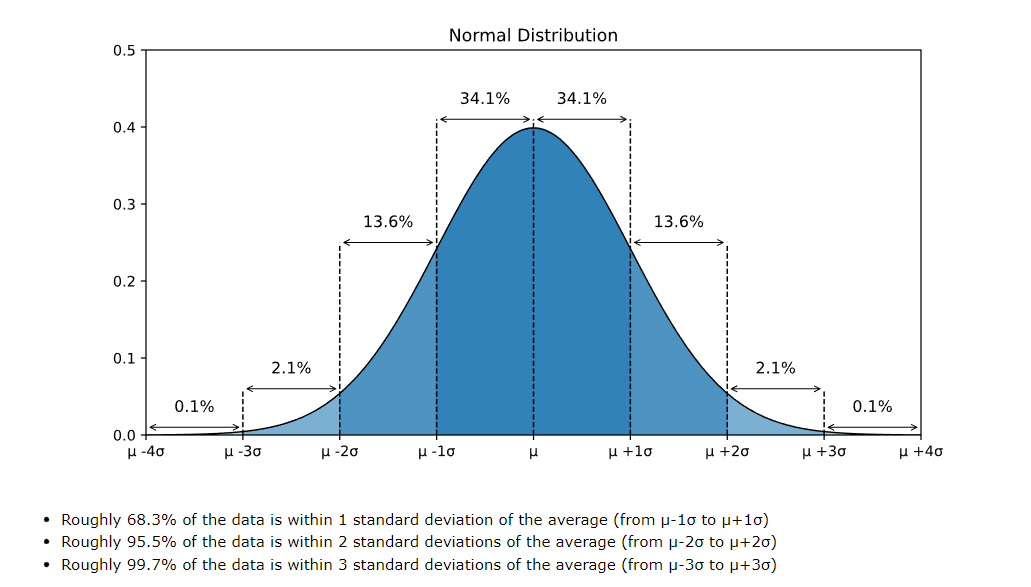

In [6]:
df.Age.mean()

29.69911764705882

In [12]:
extreme=df.Age.mean()+3*df.Age.std()

C:\Users\Prathamesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

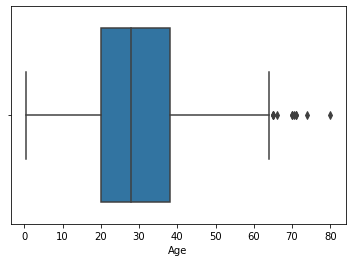

In [11]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [15]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [16]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [17]:
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot:>

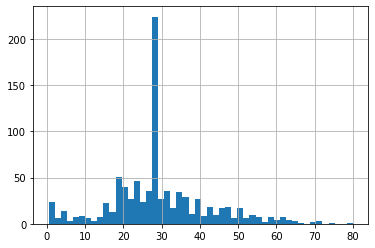

In [22]:
df['Age'].hist(bins=50)

<AxesSubplot:>

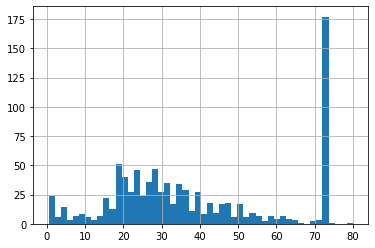

In [23]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Prathamesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

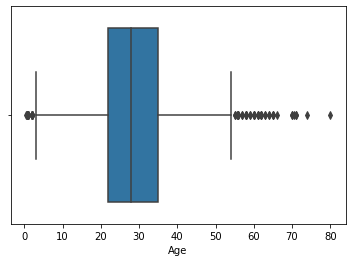

In [25]:
sns.boxplot('Age',data=df)

C:\Users\Prathamesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

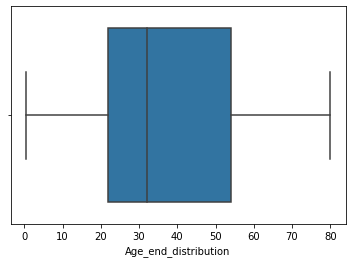

In [24]:
sns.boxplot('Age_end_distribution',data=df)

## As we can see in the above Boxplot there are no outliers present.

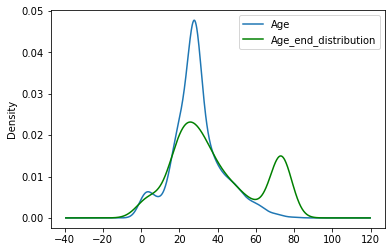

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_end_distribution.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Advantages
1. Easy to implement

2. Fast way of obtaining complete datasets

3. Can be integrated into production (during model deployment)

4. Captures the importance of “missingness” if there is one

## Disadvantages 
1. Distortion of the original variable distribution

2. Distortion of the original variance

3. Distortion of the covariance with the remaining variables of the dataset

4. This technique may mask true outliers in the distribution